PILAR ARIAS, YEDRA MARTÍN, PATRICIA MEDIAVILLA, AMAYA SARASA

<GRUPO 9>

#Práctica 1

##Introducción

Esta es la primera práctica del segundo laboratorio. Dada una base de datos en formato .csv, se nos pide contestar a una serie de cuestiones. Para ello, lo priemro que debemos hacer es cargar y leer la base de datos:

In [56]:
!pip install mlxtend==0.13.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [57]:
#Importar librerías
#!apt install mlxtend
import numpy as np #numpy
import pandas as pd #pandas
import sklearn as sk #scikit-learn
import matplotlib.pyplot as plt #gráfica Matplotlib
#from mlxtend.frequent_patterns import apriori
#from apyori import apriori #apriori
from mlxtend.preprocessing import TransactionEncoder
#from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import apriori, association_rules
#from mlxtend.frequent_patterns import frequent_patterns
#from mlxtend import frequent_patterns
#from mlxtend.frequent_patterns import frequent_patterns

#Importamos la base de datos
df = pd.read_csv('BlackFriday.csv',sep=',')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


----------------

----------------

Subimos la base de datos, df.info nos aporta la infomación que contiene la base de datos, vemos el tipo, la cantidad de las variables con las que trabajamos... y .head vamos a ver que forma tiene la base de datos y las primeras filas de esta.

Según se ha estudiado en clase, encontramos dos métodos para afrontarlo. Nos decantaremos por CRISP-DM. Las siglas para: CRoss-Industry Standard Process for Data Mining. 

Es un modelo de proceso de minería de datos que se utiliza en la industria. Es un marco de trabajo que define un proceso estandarizado para llevar a cabo proyectos de minería de datos, desde la definición del problema hasta la implementación y evaluación del resultado. Los seis pasos que componen Crisp-DM son los siguientes:

- Comprensión de los negocios y definición del problema: comprender la naturaleza del problema y los objetivos de negocio.

- Comprensión de los datos: recopilación inicial, descripción y exploración  de datos.

- Preparación de los datos: Selección, limpieza, construcción, integración, formateo de los datos.

- Modelado: aplicar las técnicas de minería de datos a los dataset.

- Evaluación: determinar si los resultados son útiles a las necesidades del negocio.

- Despliegue: explotar utilidad de los modelos, integrándolos en las tareas de toma de decisiones de la organización -> Call to Action. 

##Comprensión de los negocios y definición del problema

La librería se usará de la siguiente manera:
1) Empezaremos obteniendo los itemsets frecuentes para k=1. En este punto necesitaremos obtener el
soporte de los itemset. Por lo tanto, se tendrá que usar un método que dado un itemset devuelva su
soporte.

2) Para k≥2.
a. Mostrar los itemset frecuentes candidatos y su soporte.

3) Repetir el proceso 2 hasta que no se generen nuevos itemsets frecuentes.

4) Mostrar todas las posibles reglas con la confianza de cada una de ellas.

5) Listar todas las reglas que sean de alta confianza.

6) Usar los siguientes métodos. Dado un antecesor, devolver todas las reglas que contengan a dicho
antecesor. Dado un umbral mínimo devolver todas las reglas que cumplan con dicha confianza.

7) Utiliza las representaciones gráficas que consideres adecuadas para representar las reglas obtenidas
y obtener conclusiones a partir de los datos.

A partir de lo anterior de pide:
- Prueba al menos tres configuraciones de soporte y frecuencia para cada género, edad y tipo de producto.
- ¿Qué diferencias hay entre usar soporte y frecuencia? Respalda la respuesta con datos 
- ¿Qué tipo reglas desaparecen según la configuración y categorías (género, edad y tipo de producto)
consideradas? ¿Por qué? 
- Para una de las configuraciones, interpreta algunas de las reglas que te hayan resultado interesantes
obtenidas usando la clase association_rules y un par de configuraciones cambiando la variable metric y
min_threshold. Justifica los resultados. 
- Dadas las mejores configuraciones. ¿Existen reglas o patrones que se repitan? ¿Podemos generalizar de
alguna manera como se comportan los clientes? Expón las conclusiones respaldadas con datos 

## Comprensión de los datos

La base de datos que utilizaremos consta de 233599 observaciones. Teniendo en ceunta que el trabajo que vamos a realizar, utilizanod el algoritmo apriori, queremos sacar regalas y con todos estos datos, lo que nos hace pensar es que vamos a encontrar muchísimas reglas a partir de estos datos.

La clave está en cuales son las que más nos interesan, basandonos en su confianza, y una vez hallado esto debemos tomar decisiones para que usando estas reglas vendamos el mayor número de producto, para aumentar nuestras gananzas.

Existen 11 tipos de atributos distintos: 

- User_ID: número para identificar al usuario.
- Product_ID: número para identificar el producto.
- Gender: Género del comprador.	
- Age: Edad del comprador.
- Occupation: A lo que se dedica el comprador, ya pasasdo a categórica.
- City_Category: Categoría de la ciudad donde reside el user.
- Stay_In_Current_City_Years: El tiempo que lleva en la ciudad.
- Marital_Status: Estado civil.
- Product_Category_1: La categoría principal del producto.
- Product_Category_2: Siguente categoría.
- Product_Category_3: Última categoría del producto.



##Preparación de los datos

In [58]:
usernan = df['User_ID'].isna().sum()
print(f"La cantidad de NaN que existen en la variable User_ID es:{usernan}")
productnan = df['Product_ID'].isna().sum()
print(f"La cantidad de NaN que existen en la variable Product_ID es:{productnan}")
gendernan = df['Gender'].isna().sum()
print(f"La cantidad de NaN que existen en la variable Gender es:{gendernan}")
agenan = df['Age'].isna().sum()
print(f"La cantidad de NaN que existen en la variable Age es:{agenan}")
ocupationan = df['Occupation'].isna().sum()
print(f"La cantidad de NaN que existen en la variable Occupation es:{ocupationan}")
City_Categorynan = df['City_Category'].isna().sum()
print(f"La cantidad de NaN que existen en la variable City_Category es:{City_Categorynan}")
Stay_In_Current_City_Yearsnan = df['Stay_In_Current_City_Years'].isna().sum()
print(f"La cantidad de NaN que existen en la variable Stay_In_Current_City_Years es:{Stay_In_Current_City_Yearsnan}")
Marital_Statusnan = df['Marital_Status'].isna().sum()
print(f"La cantidad de NaN que existen en la variable Marital_Status es:{Marital_Statusnan}")
Product_Category_1nan = df['Product_Category_1'].isna().sum()
print(f"La cantidad de NaN que existen en la variable Product_Category_1 es:{Product_Category_1nan}")
Product_Category_2nan = df['Product_Category_2'].isna().sum()
print(f"La cantidad de NaN que existen en la variable Product_Category_2 es:{Product_Category_2nan}")
Product_Category_3nan = df['Product_Category_3'].isna().sum()
print(f"La cantidad de NaN que existen en la variable Product_Category_3 es:{Product_Category_3nan}")

La cantidad de NaN que existen en la variable User_ID es:0
La cantidad de NaN que existen en la variable Product_ID es:0
La cantidad de NaN que existen en la variable Gender es:0
La cantidad de NaN que existen en la variable Age es:0
La cantidad de NaN que existen en la variable Occupation es:0
La cantidad de NaN que existen en la variable City_Category es:0
La cantidad de NaN que existen en la variable Stay_In_Current_City_Years es:0
La cantidad de NaN que existen en la variable Marital_Status es:0
La cantidad de NaN que existen en la variable Product_Category_1 es:0
La cantidad de NaN que existen en la variable Product_Category_2 es:72344
La cantidad de NaN que existen en la variable Product_Category_3 es:162562


In [59]:
# Rellenamos los valores na con 0, ya que no tiene categoría
df = df.fillna(0)

# Quitamos los duplicados
df = df.drop_duplicates()

##Modelado

In [60]:
df_User_Product = (df
        .groupby(['User_ID', 'Product_ID'])['Product_Category_1']
        .sum()
        .apply(lambda x:x>0)
        .unstack()
        .fillna(False)
        .reset_index()
        .set_index('User_ID')
          )

In [61]:
df_Gender = (df
            .groupby(['User_ID','Gender'])['Product_Category_1']
            .sum()
            .apply(lambda x: x>0)
            .unstack()
            .fillna(False)
            .reset_index()
            .set_index('User_ID')
)

In [62]:
df_Age = (df
        .groupby(['User_ID','Age'])['Product_Category_1']
        .sum()
        .apply(lambda x: x>0)
        .unstack()
        .fillna(False)
        .reset_index()
        .set_index('User_ID')
)

In [63]:
df_Occupation = (df
                .groupby(['User_ID','Occupation'])['Product_Category_1']
                .sum()
                .apply(lambda x: x>0)
                .unstack()
                .fillna(False)
                .reset_index()
                .set_index('User_ID')
)

In [64]:
df_City = (df
          .groupby(['User_ID','City_Category'])['Product_Category_1']
          .sum()
          .apply(lambda x: x>0)
          .unstack()
          .fillna(False)
          .reset_index()
          .set_index('User_ID')
)

In [65]:
df_Stay = (df
           .groupby(['User_ID','Stay_In_Current_City_Years'])['Product_Category_1']
           .sum()
           .apply(lambda x: x>0)
           .unstack()
           .fillna(False)
           .reset_index()
           .set_index('User_ID')
)

In [66]:
df_Marital = (df
              .groupby(['User_ID','Marital_Status'])['Product_Category_1']
              .sum()
              .apply(lambda x: x>0)
              .unstack()
              .fillna(False)
              .reset_index()
              .set_index('User_ID')
)

In [67]:
df_Product_Category_1 = (df
                         .groupby(['User_ID','Product_Category_1'])['Product_Category_2']
                         .sum()
                         .apply(lambda x: x>0)
                         .unstack()
                         .fillna(False)
                         .reset_index()
                         .set_index('User_ID')
)

In [68]:
df_Product_Category_2 = (df
                         .groupby(['User_ID','Product_Category_2'])['Product_Category_1']
                         .sum()
                         .apply(lambda x: x>0)
                         .unstack()
                         .fillna(False)
                         .reset_index()
                         .set_index('User_ID')
)

In [69]:
df_Product_Category_3 = (df
                         .groupby(['User_ID','Product_Category_3'])['Product_Category_1']
                         .sum()
                         .apply(lambda x: x>0)
                         .unstack()
                         .fillna(False)
                         .reset_index()
                         .set_index('User_ID')
)

In [70]:
df_Stay.value_counts()

0      1      2      3      4+   
False  True   False  False  False    2086
       False  True   False  False    1145
              False  True   False     979
                     False  True      909
True   False  False  False  False     772
dtype: int64

In [71]:
df_Product_Category_1=df_Product_Category_1.set_axis(['1_PC1','2_PC1','3_PC1','4_PC1','5_PC1','6_PC1','7_PC1','8_PC1','9_PC1','10_PC1','11_PC1','12_PC1','13_PC1','14_PC1','15_PC1','16_PC1','17_PC1','18_PC1'], axis=1)

In [72]:
df_Product_Category_2=df_Product_Category_2.set_axis(['0_PC2','2_PC2','3_PC2','4_PC2','5_PC2','6_PC2','7_PC2','8_PC2','9_PC2','10_PC2','11_PC2','12_PC2','13_PC2','14_PC2','15_PC2','16_PC2','17_PC2','18_PC2'], axis=1)

In [73]:
df_Product_Category_3=df_Product_Category_3.set_axis(['0_PC3','3_PC3','4_PC3','5_PC3','6_PC3','8_PC3','9_PC3','10_PC3','11_PC3','12_PC3','13_PC3','14_PC3','15_PC3','16_PC3','17_PC3','18_PC3'],axis=1)

In [74]:
df_Marital=df_Marital.set_axis(['0_Marital', '1_Marital'], axis=1)

In [75]:
df_Occupation=df_Occupation.set_axis(['0_Occ','1_Occ', '2_Occ', '3_Occ', '4_Occ', '5_Occ', '6_Occ', '7_Occ', '8_Occ', '9_Occ', '10_Occ', '11_Occ', '12_Occ', '13_Occ', '14_Occ', '15_Occ', '16_Occ', '17_Occ', '18_Occ', '19_Occ', '20_Occ'], axis=1)

In [76]:
df_Stay=df_Stay.set_axis(['0_Stay','1_Stay','2_Stay','3_Stay','4+_Stay'],axis=1)

In [77]:
data = pd.concat([df_User_Product, df_Occupation, df_City, df_Stay, df_Marital, df_Product_Category_1, df_Product_Category_2, df_Product_Category_3, df_Age, df_Gender], axis = 1)
data

,P00000142,P00000242,P00000342,P00000442,P00000542,P00000642,P00000742,P00000842,P00000942,P00001042,...,18_PC3,0-17,18-25,26-35,36-45,46-50,51-55,55+,F,M
User_ID,,,,,,,,,,,,,,,,,,,,,
1000001,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
1000002,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
1000003,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,True
1000004,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
1000005,False,False,False,False,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006036,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,True,False
1006037,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
1006038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False


In [78]:
print(data.shape)

(5891, 3583)


In [79]:
#Esto es para k=1 // use_colnames = True, max_len = 3
#frq_items = apriori(df, min_support = 0.05, use_colnames = True, max_len = 3)

frequent_itemsets = apriori(data, min_support=0.5, use_colnames=True)
print(frequent_itemsets)

      support                                           itemsets
0    0.532847                                                (C)
1    0.580037                                        (0_Marital)
2    0.905958                                            (1_PC1)
3    0.536581                                            (2_PC1)
4    0.852996                                            (5_PC1)
..        ...                                                ...
754  0.511119       (16_PC2, 8_PC2, 5_PC1, 14_PC2, 0_PC2, 0_PC3)
755  0.506196  (2_PC2, 8_PC2, 8_PC1, 1_PC1, 5_PC1, 0_PC2, 0_PC3)
756  0.539467  (8_PC2, 8_PC1, 1_PC1, 5_PC1, 14_PC2, 0_PC2, 0_...
757  0.508403  (16_PC2, 8_PC2, 8_PC1, 1_PC1, 5_PC1, 0_PC2, 0_...
758  0.512137  (2_PC2, 8_PC2, 1_PC1, 5_PC1, 14_PC2, 0_PC2, 0_...

[759 rows x 2 columns]


In [80]:
#Para k=1

frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets1=frequent_itemsets[frequent_itemsets['itemsets'] == '18-25']
frequent_itemsets1

,support,itemsets,length


In [81]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
max(frequent_itemsets['length'])

7

In [82]:
#Para k>=2
i=2
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
while i <= max(frequent_itemsets['length']):
  print(frequent_itemsets[frequent_itemsets['length'] == i]) 
  i=i+1

      support            itemsets  length
23   0.531149          (0_PC3, C)       2
24   0.527245  (1_PC1, 0_Marital)       2
25   0.546936  (0_Marital, 0_PC2)       2
26   0.578679  (0_Marital, 0_PC3)       2
27   0.516551      (1_PC1, 2_PC1)       2
..        ...                 ...     ...
125  0.564420     (15_PC3, 0_PC3)       2
126  0.669496     (0_PC3, 16_PC3)       2
127  0.556782     (17_PC3, 0_PC3)       2
128  0.715498          (M, 0_PC3)       2
129  0.503650         (M, 16_PC3)       2

[107 rows x 3 columns]
      support                   itemsets  length
130  0.526226  (1_PC1, 0_Marital, 0_PC3)       3
131  0.546936  (0_Marital, 0_PC2, 0_PC3)       3
132  0.500934      (1_PC1, 2_PC1, 0_PC2)       3
133  0.516041      (1_PC1, 2_PC1, 0_PC3)       3
134  0.647938      (1_PC1, 5_PC1, 8_PC1)       3
..        ...                        ...     ...
336  0.544050    (0_PC3, 15_PC2, 16_PC3)       3
337  0.504838         (15_PC2, M, 0_PC3)       3
338  0.553217    (16_PC3, 16_PC

Pero tenemos que quitar aquellas reglas que tengan un 0 en el antecedente o en la consecuencia. 

In [83]:
frequent_itemsets

,support,itemsets,length
0,0.532847,(C),1
1,0.580037,(0_Marital),1
2,0.905958,(1_PC1),1
3,0.536581,(2_PC1),1
4,0.852996,(5_PC1),1
...,...,...,...
754,0.511119,"(16_PC2, 8_PC2, 5_PC1, 14_PC2, 0_PC2, 0_PC3)",6
755,0.506196,"(2_PC2, 8_PC2, 8_PC1, 1_PC1, 5_PC1, 0_PC2, 0_PC3)",7
756,0.539467,"(8_PC2, 8_PC1, 1_PC1, 5_PC1, 14_PC2, 0_PC2, 0_...",7
757,0.508403,"(16_PC2, 8_PC2, 8_PC1, 1_PC1, 5_PC1, 0_PC2, 0_...",7


In [84]:
#mask = (rules['antecedents'].apply(lambda x: '0_PC2' in x) | rules['consequents'].apply(lambda x: '0_PC2' in x) | rules['antecedents'].apply(lambda x: '0_PC3' in x) | rules['consequents'].apply(lambda x: '0_PC3' in x))
frequents_with_zero=frequent_itemsets['itemsets'].apply(lambda x: '0_PC2' in x) |frequent_itemsets['itemsets'].apply(lambda x: '0_PC3' in x)



In [85]:
frequent_itemsets

,support,itemsets,length
0,0.532847,(C),1
1,0.580037,(0_Marital),1
2,0.905958,(1_PC1),1
3,0.536581,(2_PC1),1
4,0.852996,(5_PC1),1
...,...,...,...
754,0.511119,"(16_PC2, 8_PC2, 5_PC1, 14_PC2, 0_PC2, 0_PC3)",6
755,0.506196,"(2_PC2, 8_PC2, 8_PC1, 1_PC1, 5_PC1, 0_PC2, 0_PC3)",7
756,0.539467,"(8_PC2, 8_PC1, 1_PC1, 5_PC1, 14_PC2, 0_PC2, 0_...",7
757,0.508403,"(16_PC2, 8_PC2, 8_PC1, 1_PC1, 5_PC1, 0_PC2, 0_...",7


In [86]:
frequent_itemsets = frequent_itemsets.drop(frequent_itemsets[frequents_with_zero].index)

In [87]:
#Reglas de asociación
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(1_PC1),(0_Marital),0.905958,0.580037,0.527245,0.581975,1.003340,0.001755,1.004635
1,(0_Marital),(1_PC1),0.580037,0.905958,0.527245,0.908984,1.003340,0.001755,1.033250
2,(1_PC1),(2_PC1),0.905958,0.536581,0.516551,0.570171,1.062599,0.030430,1.078146
3,(2_PC1),(1_PC1),0.536581,0.905958,0.516551,0.962670,1.062599,0.030430,2.519203
4,(1_PC1),(5_PC1),0.905958,0.852996,0.781531,0.862657,1.011326,0.008752,1.070341
...,...,...,...,...,...,...,...,...,...
1265,(16_PC2),"(1_PC1, 5_PC1, 14_PC2, 8_PC2)",0.723986,0.607707,0.503819,0.695897,1.145120,0.063848,1.290001
1266,(8_PC2),"(1_PC1, 16_PC2, 5_PC1, 14_PC2)",0.830929,0.533186,0.503819,0.606333,1.137188,0.060780,1.185809
1267,(1_PC1),"(16_PC2, 5_PC1, 14_PC2, 8_PC2)",0.905958,0.516551,0.503819,0.556118,1.076598,0.035846,1.089138
1268,(5_PC1),"(1_PC1, 16_PC2, 14_PC2, 8_PC2)",0.852996,0.525378,0.503819,0.590647,1.124233,0.055674,1.159444


In [88]:
rules.iloc[400]

antecedents           (2_PC2, 5_PC1)
consequents                  (8_PC2)
antecedent support          0.644543
consequent support          0.830929
support                     0.587846
confidence                  0.912036
lift                         1.09761
leverage                    0.052277
conviction                  1.922049
Name: 400, dtype: object

In [89]:
#vemos reglas de alta confianza
rulesaltaconfianza = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.95)
rulesaltaconfianza

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(2_PC1),(1_PC1),0.536581,0.905958,0.516551,0.962670,1.062599,0.030430,2.519203
1,(2_PC2),(1_PC1),0.729588,0.905958,0.729588,1.000000,1.103804,0.068612,inf
2,(4_PC2),(1_PC1),0.527075,0.905958,0.500934,0.950403,1.049058,0.023426,1.896102
3,(5_PC2),(1_PC1),0.592938,0.905958,0.571550,0.963928,1.063987,0.034372,2.607047
4,(6_PC2),(1_PC1),0.516890,0.905958,0.502971,0.973071,1.074079,0.034690,3.492160
...,...,...,...,...,...,...,...,...,...
87,"(1_PC1, 2_PC2, 14_PC2, 8_PC2)",(5_PC1),0.537430,0.852996,0.518757,0.965256,1.131606,0.060332,4.231040
88,"(2_PC2, 5_PC1, 14_PC2, 8_PC2)",(1_PC1),0.518757,0.905958,0.518757,1.000000,1.103804,0.048785,inf
89,"(2_PC2, 14_PC2, 8_PC2)","(1_PC1, 5_PC1)",0.537430,0.781531,0.518757,0.965256,1.235083,0.098739,6.287931
90,"(1_PC1, 16_PC2, 14_PC2, 8_PC2)",(5_PC1),0.525378,0.852996,0.503819,0.958966,1.124233,0.055674,3.582497


OBSERVACIÓN SOBRE: 18-25

In [90]:
print(rules[rules['antecedents'].apply(lambda x: 'M' in x)])


           antecedents            consequents  antecedent support  \
35                 (M)                (1_PC1)            0.717196   
58                 (M)                (5_PC1)            0.717196   
72                 (M)                (8_PC1)            0.717196   
89                 (M)                (2_PC2)            0.717196   
108                (M)                (8_PC2)            0.717196   
116                (M)               (14_PC2)            0.717196   
123                (M)               (15_PC2)            0.717196   
127                (M)               (16_PC2)            0.717196   
128                (M)               (16_PC3)            0.717196   
184         (1_PC1, M)                (5_PC1)            0.663724   
186         (M, 5_PC1)                (1_PC1)            0.608216   
188                (M)         (1_PC1, 5_PC1)            0.717196   
226         (1_PC1, M)                (8_PC1)            0.663724   
228         (M, 8_PC1)            

In [91]:
#ya tenemos otra manera
for i in range(len(rules)):
  if 'M' in rules['antecedents'][i]:
    print(rules.iloc[i])

antecedents                (M)
consequents            (1_PC1)
antecedent support    0.717196
consequent support    0.905958
support               0.663724
confidence            0.925444
lift                  1.021508
leverage              0.013975
conviction            1.261354
Name: 35, dtype: object
antecedents                (M)
consequents            (5_PC1)
antecedent support    0.717196
consequent support    0.852996
support               0.608216
confidence            0.848047
lift                  0.994198
leverage             -0.003549
conviction            0.967432
Name: 58, dtype: object
antecedents                (M)
consequents            (8_PC1)
antecedent support    0.717196
consequent support    0.767951
support               0.550331
confidence            0.767337
lift                  0.999201
leverage              -0.00044
conviction            0.997362
Name: 72, dtype: object
antecedents                (M)
consequents            (2_PC2)
antecedent support    0.71719

In [92]:
for i in range(len(rulesaltaconfianza)):
  if rulesaltaconfianza['confidence'][i] > 0.98:
    print(rulesaltaconfianza.iloc[i])

antecedents            (2_PC2)
consequents            (1_PC1)
antecedent support    0.729588
consequent support    0.905958
support               0.729588
confidence                 1.0
lift                  1.103804
leverage              0.068612
conviction                 inf
Name: 1, dtype: object
antecedents           (15_PC3)
consequents            (1_PC1)
antecedent support    0.565099
consequent support    0.905958
support               0.560007
confidence            0.990988
lift                  1.093856
leverage               0.04805
conviction             10.4355
Name: 9, dtype: object
antecedents           (2_PC2, 5_PC1)
consequents                  (1_PC1)
antecedent support          0.644543
consequent support          0.905958
support                     0.644543
confidence                       1.0
lift                        1.103804
leverage                    0.060614
conviction                       inf
Name: 12, dtype: object
antecedents           (15_PC3, 5_PC1)
c

NO BORRAR: 

In [93]:
#frequent_itemsets = apriori(data, min_support=0.6, use_colnames=True)
#frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
#frequent_itemsets1=frequent_itemsets[frequent_itemsets['length'] == 1]

In [94]:
#frequent_itemsets[ (frequent_itemsets['length'] >1 ) & #esto sería para k=2
                   #(frequent_itemsets['support'] >= 0.8) ]

Vale, hay un apartado que pide representar gráficamente las reglas: 

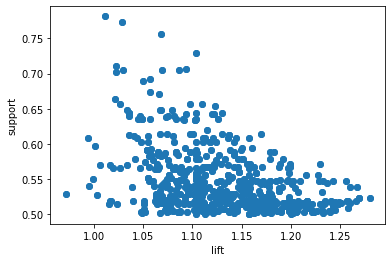

In [95]:
plt.scatter(rules['lift'], rules['support'])
plt.xlabel('lift')
plt.ylabel('support')
plt.show()

In [96]:
#la confianza y soporte tienden a ser directamente proporcionales

In [97]:
min(rules['support'])

0.5002546257002207

##Preguntas 


### 1. Prueba al menos tres configuraciones de soporte y frecuencia para cada género, edad y tipo de producto.

In [99]:
Age_Range = df_Age.columns.values.tolist()
PC1_Range = df_Product_Category_1.columns.values.tolist()
PC2_Range = df_Product_Category_2.columns.values.tolist()
PC3_Range = df_Product_Category_3.columns.values.tolist()
Gender_Range = df_Gender.columns.values.tolist()
Names_Range=[Age_Range, PC1_Range, PC2_Range, PC3_Range, Gender_Range] 

In [100]:
for i in range(0,3): #porque son 3 valores de soporte 
  frequent_itemsets = apriori(data, min_support=0.2+0.2*i, use_colnames=True)
  print('Con soporte = ', 0.2 + 0.2*i)
  for j in Names_Range: 
    for k in j: 
      print('Atributo: ', k)
      frequent_itemsets_1=frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: k in x)]
      print(frequent_itemsets_1)


KeyboardInterrupt: ignored

### 2. ¿Qué diferencias hay entre usar soporte y frecuencia? Respalda la respuesta con datos (1 punto) 

##Evaluación

##Despliegue